<a href="https://colab.research.google.com/github/KNmitra/Bhavcopy/blob/master/How_to_Save_NSE_EOD_Data_in_Google_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os.path
from os import path

if path.exists('/content/Trading_Project') == False:
  os.mkdir('/content/Trading_Project')

os.chdir('/content/Trading_Project')
!pwd
!ls

/content/Trading_Project


In [ ]:
#Installing some usefull library and import tham
#Downloading historical data from Nsepy
import warnings
warnings.filterwarnings('ignore')
try:
    import nsepy
except:
    !pip install -q nsepy
    import nsepy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date,timedelta
from nsepy import get_history as history_data
plt.style.use('fivethirtyeight')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
stocksymbols = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']
#startdate = date(2019,10,14)
start_date= date.today()-timedelta(days=365*10)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2023-01-08
You have 8 assets in your porfolio


In [4]:
#fetching data
df = pd.DataFrame()
for i in range (len(stocksymbols)):
    data = history_data(symbol=stocksymbols[i],start =(start_date),end =(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace = True)
    data.drop(['Symbol'],axis = 1 , inplace = True)
    if i == 0 :
        df = data
    if i != 0 :
        df = df.join(data)
    
print(df.tail(10))


            TATAMOTORS   DABUR  ICICIBANK   WIPRO    BPCL   IRCTC     INFY  \
Date                                                                         
2022-12-26      384.80  566.10     893.20  380.50  325.10  622.05  1502.40   
2022-12-27      394.15  573.50     900.65  386.60  326.00  633.10  1514.85   
2022-12-28      391.30  569.15     898.95  387.80  324.10  638.75  1510.15   
2022-12-29      385.90  560.95     908.05  390.75  327.20  633.05  1517.55   
2022-12-30      387.95  561.45     890.85  392.75  330.50  639.70  1508.20   
2023-01-02      394.80  561.55     902.45  393.05  333.85  642.35  1524.00   
2023-01-03      393.90  560.85     901.35  397.05  336.85  644.05  1522.55   
2023-01-04      385.60  559.85     899.10  389.70  336.30  635.20  1494.80   
2023-01-05      386.90  572.75     879.15  386.90  342.35  637.15  1475.20   
2023-01-06      382.00  552.85     870.10  382.00  344.70  636.25  1448.50   

            RELIANCE  
Date                  
2022-12-26   2524

In [8]:
df.to_csv('/content/Trading_Project/NSE_EOD.csv')

In [13]:
df.tail(100)

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2022-08-16,489.85,579.60,879.25,437.10,345.90,668.15,1596.45,2651.30
2022-08-17,485.40,584.95,883.25,443.05,353.15,671.65,1606.25,2665.15
2022-08-18,484.80,594.60,885.10,435.05,347.05,714.15,1582.95,2661.30
2022-08-19,471.00,587.20,870.40,432.45,338.25,735.15,1597.10,2613.85
2022-08-22,454.60,584.20,852.25,420.00,333.65,712.50,1575.65,2606.60
...,...,...,...,...,...,...,...,...
2023-01-02,394.80,561.55,902.45,393.05,333.85,642.35,1524.00,2575.90
2023-01-03,393.90,560.85,901.35,397.05,336.85,644.05,1522.55,2557.05
2023-01-04,385.60,559.85,899.10,389.70,336.30,635.20,1494.80,2518.55


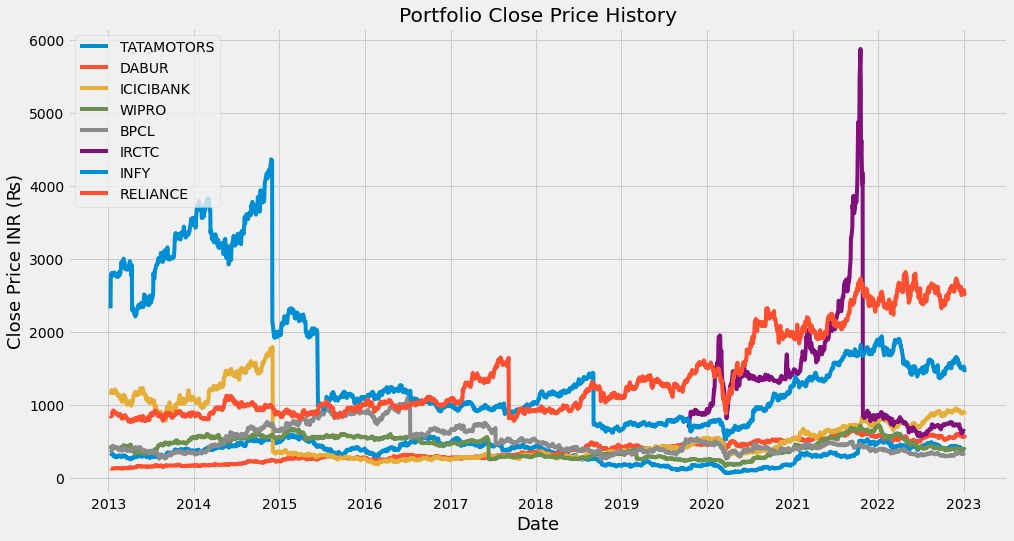

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)